In [40]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl

import pandas
from pandas import DataFrame, Series

In [79]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
 # read the data in
df = pd.read_csv("http://www.ats.ucla.edu/stat/data/binary.csv")

In [3]:

df.columns = ["admit", "gre", "gpa", "prestige"]
df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [4]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [5]:
print df.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64


[[<matplotlib.axes._subplots.AxesSubplot object at 0x113266750>


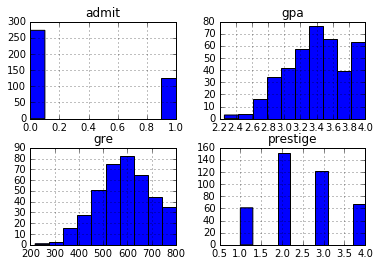

In [6]:
print df.hist()

In [7]:
df.groupby(['admit','prestige']).count()


gre  gpa
admit prestige          
0     1          28   28
      2          97   97
      3          93   93
      4          55   55
1     1          33   33
      2          54   54
      3          28   28
      4          12   12

In [8]:
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige   1   2   3   4
admit                   
0         28  97  93  55
1         33  54  28  12


(array([  61.,    0.,    0.,  151.,    0.,    0.,  121.,    0.,    0.,   67.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

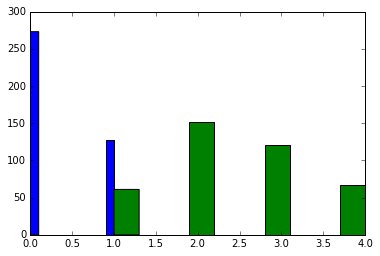

In [9]:
#df.hist()
#pl.show()
plt.hist(df['admit'])
plt.hist(df['prestige'])
#plt.scatter(df[:,2],df['admit'])

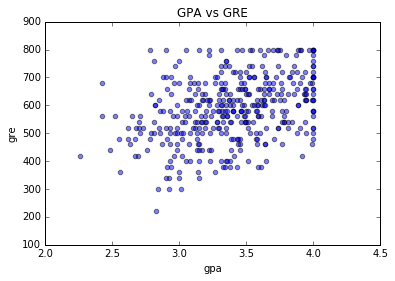

In [17]:
plt.scatter(df['gpa'], df['gre'],alpha=0.5)
plt.title('GPA vs GRE')
plt.xlabel('gpa')
plt.ylabel('gre')
#plt.show()

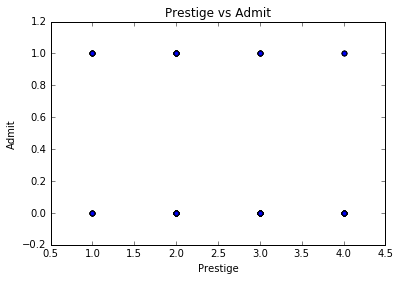

In [21]:
plt.scatter(df['prestige'], df['admit'],alpha=0.5)
plt.title('Prestige vs Admit')
plt.xlabel('Prestige')
plt.ylabel('Admit')
#plt.show()

In [10]:
# Create dummy variables for prestiege catagorical values dummify rank
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
dummy_ranks.tail()

,prestige_1,prestige_2,prestige_3,prestige_4
395,0.0,1.0,0.0,0.0
396,0.0,0.0,1.0,0.0
397,0.0,1.0,0.0,0.0
398,0.0,1.0,0.0,0.0
399,0.0,0.0,1.0,0.0


In [11]:
data = pd.concat([df,dummy_ranks],axis=1)
data = data.drop(['prestige','prestige_1'], axis=1)

In [12]:
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0.0,1.0,0.0
1,1,660,3.67,0.0,1.0,0.0
2,1,800,4.00,0.0,0.0,0.0
3,1,640,3.19,0.0,0.0,1.0
4,0,520,2.93,0.0,0.0,1.0


In [104]:
logModel = LogisticRegression()

features = data.drop('admit',1)
target = data['admit'] 
logModel.fit(features,target)


#print features
#print target

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [107]:
                                #Creating Coefficient data Drame for Features
col = data.columns
col = col.drop('admit',1)

coeff_df = DataFrame(col)

coeff_df.columns = ['Features']

coeff_df['Coefficient Estimates'] = np.transpose(logModel.coef_)



In [108]:
class_predict = logModel.predict(features)
print metrics.accuracy_score(target,class_predict)



0.7075


In [110]:
df['Predicted_Class'] = class_predict

In [115]:
print np.array(np.transpose(logModel.coef_))
    

[[ 0.00157105]
 [ 0.19332587]
 [-0.35376904]
 [-0.92422046]
 [-1.15252486]
 [ 0.51398256]]
